### comparing the [f1_score, k=10_cvs_mean, k=10_cvs_std, fitting time, querying time ,size ] 

In [1]:
# import
%matplotlib inline
import pandas as pd 
import numpy as np
import sys 
import time
from sklearn.datasets import make_classification,make_moons,make_blobs
from sklearn.datasets import make_gaussian_quantiles
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
knn = KNeighborsClassifier(n_neighbors=5)
rbf_svm = SVC(C=1.0, kernel='rbf',random_state=42)
linear_svm = SVC(C=1.0, kernel='linear',random_state=42)
gaussian_nb = GaussianNB()
logistic_regression = LogisticRegression(penalty='l2',C=1.0,random_state=42)
gradient_boosting_Classifier = GradientBoostingClassifier(n_estimators=100,random_state=42)
random_forest_gini = RandomForestClassifier(n_estimators=100, criterion="gini",random_state=42)
random_forest_entropy = RandomForestClassifier(n_estimators=100, criterion="entropy", random_state=42)
adaBoost_regressor = AdaBoostClassifier( n_estimators=100,random_state=42)
decision_tree_classifier_gini = DecisionTreeClassifier()

estimators = [knn,rbf_svm,linear_svm,gaussian_nb,logistic_regression,gradient_boosting_Classifier,
              random_forest_gini,random_forest_entropy,adaBoost_regressor,decision_tree_classifier_gini]

In [3]:
def compare(estimators_names, X, y, size=False):
    """ returns a data frame containing the comparison between the estimators
    """
    info = []
    for i in estimators_names:
        # model name
        model_name = str(i).split(sep='(')[0]

        #cvs score and time
        cvs = cross_val_score(i, X, y=y, cv=10, n_jobs=-1)
        #f1_score 
        f1_score = cross_val_score(i, X, y=y, cv=10, n_jobs=-1, scoring='f1_macro')



        #fitting time
        start = time.time()
        i.fit(X,y)
        fitting_time = time.time() - start

        #querying
        start = time.time()
        i.predict(X)
        querying_time = time.time() - start

        #size
        model_size = sys.getsizeof(i)
        #f_score
        info.append([model_name, cvs.mean(), cvs.std(), f1_score.mean(), 
                     fitting_time, querying_time, model_size])
    df = pd.DataFrame(info,columns=['name', 'cvs_mean', 'cvs_std', 'f1_score', 
                                    'training time ','prediction_time', 'size'])
    
    df.index = df['name']
    df.drop('name',inplace=True,axis=1)
    if size == False:
        df.drop('size',inplace=True,axis=1)
    return df

def comp_plot(X ,y):
    df = compare(estimators,X,y)
    plt.figure(figsize=(15,7))
    d = pd.DataFrame(X,columns=['x1','x2'])
    d['y'] = y
    plt.subplot(122)
    plt.scatter(d.x1,d.x2,c=y,cmap=get_cmap('jet'))
    plt.subplot(121)
    sns.heatmap(df.sort_values('cvs_mean',ascending=False),annot=True, cmap='jet')

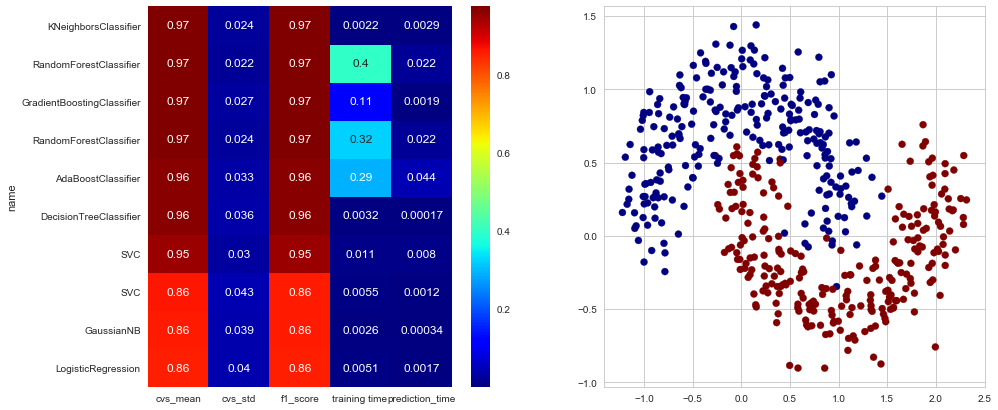

In [4]:
X, y = make_moons(n_samples=500, noise=.2,random_state=50,)
comp_plot(X,y)

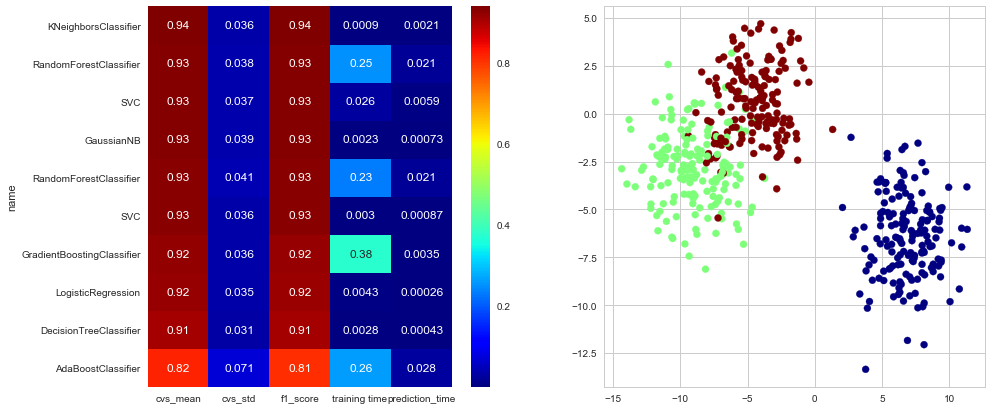

In [5]:
X, y = make_blobs(n_samples=500,centers=3,random_state=15,cluster_std=2)
comp_plot(X,y)

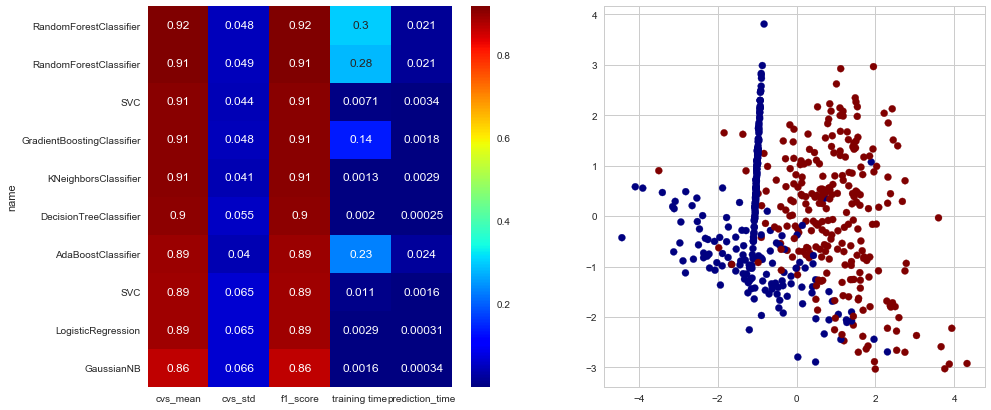

In [6]:
X, y = make_classification(n_samples=500,n_features=2, n_redundant=0, n_informative=2)
comp_plot(X,y)

/home/data-sci/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


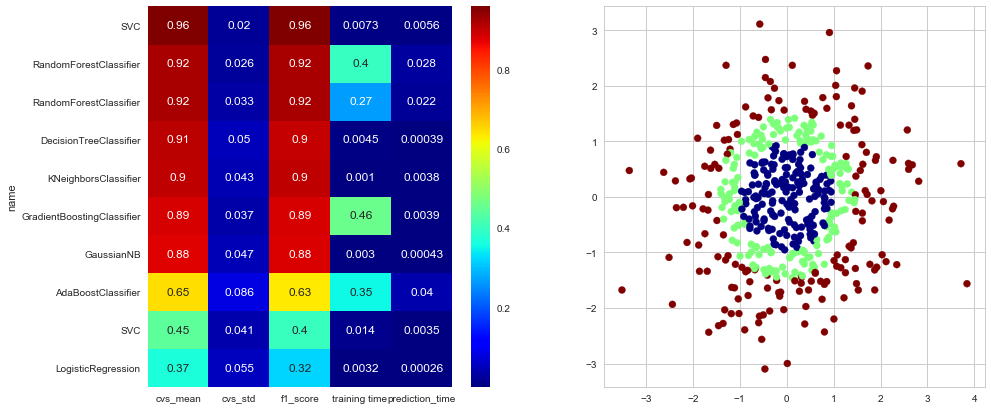

In [7]:
X,y = make_gaussian_quantiles(n_samples=500, n_features=2, n_classes=3)
comp_plot(X,y)